<a href="https://colab.research.google.com/github/arju-gituser/Python-Codes/blob/master/Hcc_missing_value_KNN_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#import seaborn as sns
#import numpy as np
#import matplotlib.pyplot as plt
 
from google.colab import files
uploaded = files.upload()

Saving hcc-data_csv1.csv to hcc-data_csv1.csv


In [2]:
import io
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['hcc-data_csv1.csv']))

Impute
     Att1  Att2  Att3  Att4  Att5  ...  Att46  Att47  Att48  Att49  Class
0       1     0     1     0     0  ...      7     68     57     84      1
1       0     2     0     0     0  ...     41     68     57     84      1
2       1     0     1     1     0  ...      0     33     39     12      1
3       1     1     1     0     0  ...      2     68     57     84      0
4       1     1     1     1     0  ...     41     50      7     20      1
..    ...   ...   ...   ...   ...  ...    ...    ...    ...    ...    ...
160     0     0     1     2     2  ...     41     68     57     84      1
161     0     1     0     2     2  ...     28     68     57     84      0
162     1     0     1     0     0  ...     41     68     57     84      1
163     1     0     1     1     0  ...     41     68     57     84      0
164     1     1     1     0     0  ...     25     68     57     84      0

[165 rows x 50 columns]
0      1
1      1
2      1
3      0
4      1
      ..
160    1
161    0
162    1

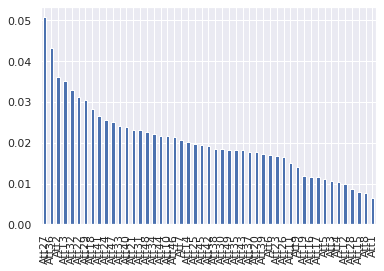

<Figure size 5.4e+06x5.4e+06 with 0 Axes>

    Specs       Score
31  Att32  115.639651
35  Att36   77.962037
46  Att47   49.871774
48  Att49   40.099074
47  Att48   39.995103
32  Att33   38.905521
29  Att30   36.790084
26  Att27   32.419501
42  Att43   26.495136
34  Att35   25.923433
36  Att37   24.770483
30  Att31   23.782688
23  Att24   20.403909
45  Att46   17.709453
12  Att13   17.423603
41  Att42   11.839169
28  Att29    8.108597
6    Att7    5.405732
21  Att22    4.991597
15  Att16    3.643987

Random Forest

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}


Confusion Matrix:
[[2 5]
 [2 8]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.62      0.80      0.70        10

    accuracy                           0.59        17
   macro avg       0.56      0.54      0.53        17
weighted avg       0.57      0.59      0.56        17



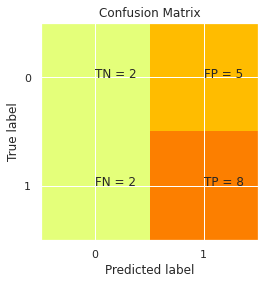

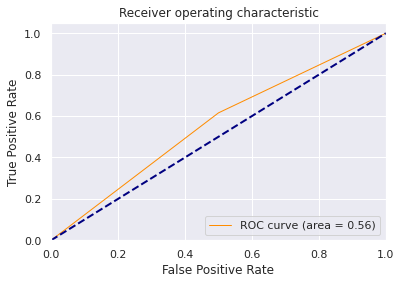


Acuuracy Of the Model:  0.5882352941176471 




In [58]:
import numpy as np

df.replace("?",np.nan, inplace=True)
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

#df.fillna(df.mean(),inplace=True)
#df.head(20)
#df['Att1'].fillna(df['Att1'].mean())
#print(df.isnull().sum())
#df.info()
#df.describe()
#df.head().T

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline
#df[~ df['Unnamed: 13'].isna()].T
#Dropping the column
#df.drop('Unnamed: 13',axis=1,inplace=True)




from sklearn.impute import KNNImputer
import pandas as pd
#df["Class"] = [1 if i =="democrat" else 0  for i in df.Class]

# Encode columns into numeric


#replace missing value with KNNimputer
#imputer=KNNImputer(n_neighbors=3)
#imputer.fit_transform(df)
#df.describe()
print("Impute")
print(df)
#replace missing value with mean






   

#Feature Importance
#Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.
#We can see that we are given an importance score for each attribute where the larger score the more important the attribute
#In the example below we construct a ExtraTreesClassifier classifier for the  dataset.
#df.replace(to_replace="?",value=np.NaN)
X = df.iloc[:,0:49]  #independent columns
y = df.iloc[:,-1]    #target column
#print(X)
print(y)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(random_state=0)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(49).plot(kind='bar')
plt.figure(figsize=(75000,75000))
plt.show()

#Univariate Selection
#provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:49] #independent columns
y = df.iloc[:,-1] #target column
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(20,'Score')) #print 10 best features



from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
y1 = df['Class']

x5=df[['Att27','Att36','Att2','Att13','Att32','Att22','Att29','Att18','Att41','Att24','Att47','Att33','Att40','Att21','Att31','Att48','Att34','Att44','Att10','Att46','Att21','Att31','Att48','Att34','Att44','Att10','Att46','Att7']]
#print(x5)
# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(x5, y1, test_size=0.10, random_state=42)
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

acc = [] # list to store all performance metric

from sklearn import metrics
def plot_confusion_metrix(Y_test,model_test):
    cm = metrics.confusion_matrix(Y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['0','1']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(Y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(Y_test, model_test))
   #cm = metrics.confusion_matrix(Y_test, model_test)
    plot_confusion_metrix(Y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,Y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier',
                    'ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier',
                    'MLPClassifier','GaussianNB','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(Y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



print("\nRandom Forest\n")
rfc=RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [300],
    'max_features': ['auto'],
    'max_depth' : [5,6,8,10],
    'criterion' :['gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring = 'roc_auc')
CV_rfc.fit(X_trainval, Y_trainval.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc)









Confusion Matrix:
[[4 3]
 [4 6]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.67      0.60      0.63        10

    accuracy                           0.59        17
   macro avg       0.58      0.59      0.58        17
weighted avg       0.60      0.59      0.59        17



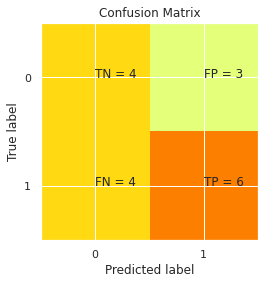

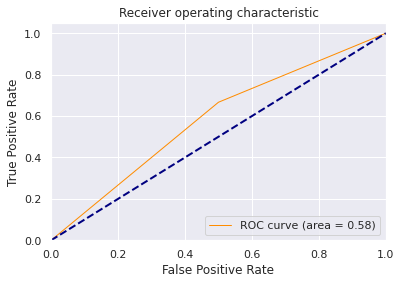


Acuuracy Of the Model:  0.5882352941176471 




In [59]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_trainval, Y_trainval.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)

LGBMClassifier : 


Confusion Matrix:
[[3 4]
 [4 6]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.60      0.60      0.60        10

    accuracy                           0.53        17
   macro avg       0.51      0.51      0.51        17
weighted avg       0.53      0.53      0.53        17



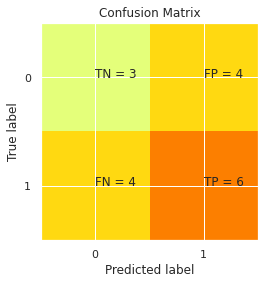

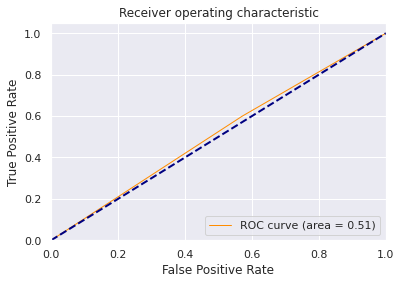


Acuuracy Of the Model:  0.5294117647058824 


ExtraTreesClassifier : 


Confusion Matrix:
[[5 2]
 [3 7]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.78      0.70      0.74        10

    accuracy                           0.71        17
   macro avg       0.70      0.71      0.70        17
weighted avg       0.71      0.71      0.71        17



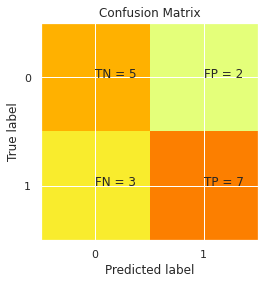

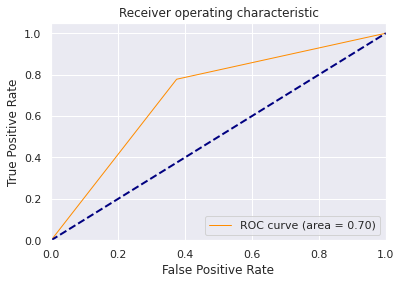


Acuuracy Of the Model:  0.7058823529411765 


GradientBoostingClassifier : 


Confusion Matrix:
[[3 4]
 [3 7]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.64      0.70      0.67        10

    accuracy                           0.59        17
   macro avg       0.57      0.56      0.56        17
weighted avg       0.58      0.59      0.58        17



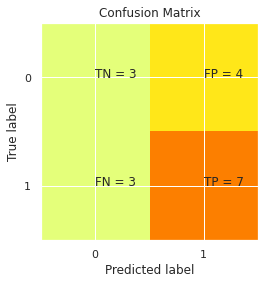

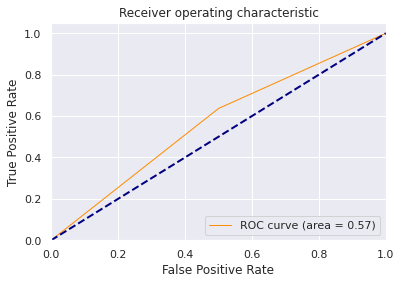


Acuuracy Of the Model:  0.5882352941176471 


AdaBoostClassifier : 


Confusion Matrix:
[[5 2]
 [3 7]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.78      0.70      0.74        10

    accuracy                           0.71        17
   macro avg       0.70      0.71      0.70        17
weighted avg       0.71      0.71      0.71        17



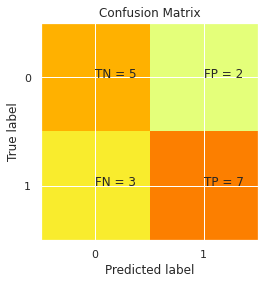

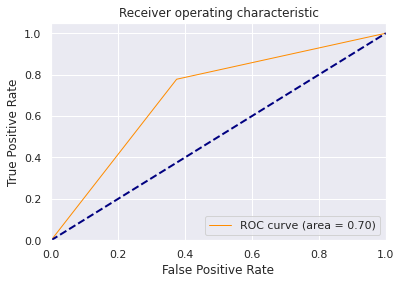


Acuuracy Of the Model:  0.7058823529411765 


KNeighborsClassifier : 


Confusion Matrix:
[[3 4]
 [3 7]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.64      0.70      0.67        10

    accuracy                           0.59        17
   macro avg       0.57      0.56      0.56        17
weighted avg       0.58      0.59      0.58        17



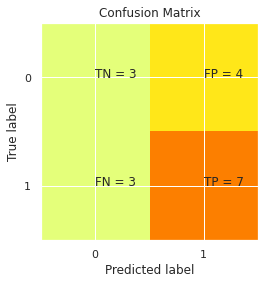

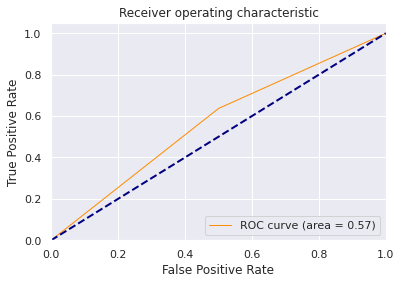


Acuuracy Of the Model:  0.5882352941176471 


MLPClassifier : 


Confusion Matrix:
[[3 4]
 [1 9]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.69      0.90      0.78        10

    accuracy                           0.71        17
   macro avg       0.72      0.66      0.66        17
weighted avg       0.72      0.71      0.68        17



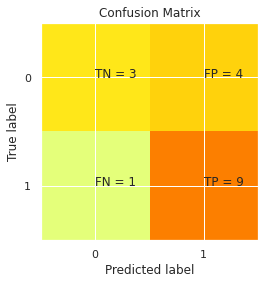

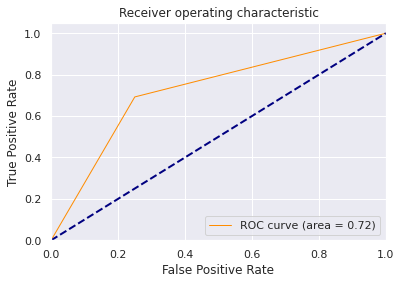


Acuuracy Of the Model:  0.7058823529411765 


GaussianNB : 


Confusion Matrix:
[[4 3]
 [2 8]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.73      0.80      0.76        10

    accuracy                           0.71        17
   macro avg       0.70      0.69      0.69        17
weighted avg       0.70      0.71      0.70        17



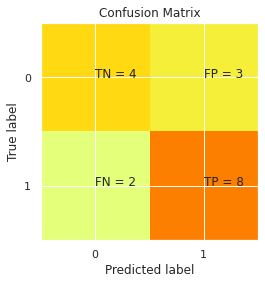

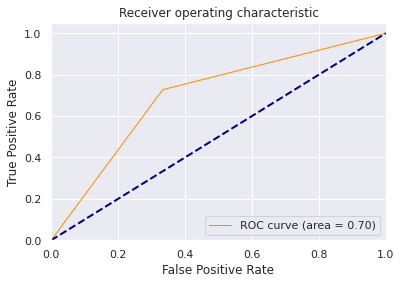


Acuuracy Of the Model:  0.7058823529411765 


LogisticRegression : 


Confusion Matrix:
[[3 4]
 [2 8]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.67      0.80      0.73        10

    accuracy                           0.65        17
   macro avg       0.63      0.61      0.61        17
weighted avg       0.64      0.65      0.63        17



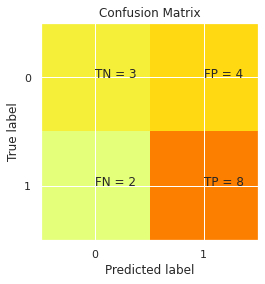

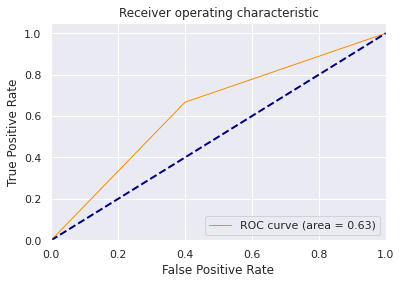


Acuuracy Of the Model:  0.6470588235294118 




In [60]:
#other classifiers
clfs =[LGBMClassifier(random_state=0),ExtraTreesClassifier(random_state=0),GradientBoostingClassifier(random_state=0),AdaBoostClassifier(random_state=0),KNeighborsClassifier(),
          MLPClassifier(alpha=1,random_state=0),GaussianNB(),LogisticRegression(random_state=0)]

for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_trainval,Y_trainval.ravel())
    X = pd.DataFrame(X_trainval)
    report_performance(model)
    roc_curves(model)
    accuracy(model)



Confusion Matrix:
[[5 2]
 [2 8]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.80      0.80      0.80        10

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17



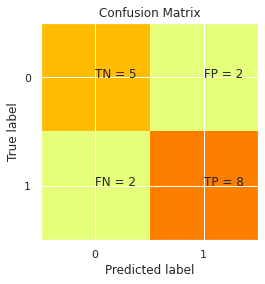

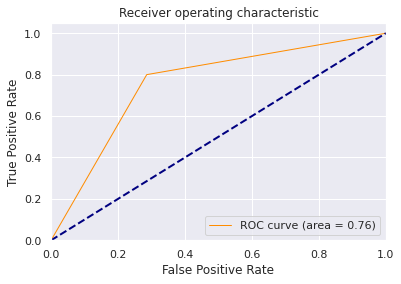


Acuuracy Of the Model:  0.7647058823529411 




In [61]:
svm = SVC(kernel="linear", C=0.5,random_state=0)
svm.fit(X_trainval, Y_trainval.ravel())
report_performance(svm)
roc_curves(svm)
accuracy(svm)